In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import configparser
from os import path
import pandas as pd
import matplotlib.gridspec as gridspec
import io_util as iot
import locale
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, DrawingArea, HPacker
from cycler import cycler
import matplotlib.path as mpath
import mri_draw_utils as mrd
import math_format as mf
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatterSciNotation
import io_util
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.mlab import griddata


In [52]:
data_path = "/work/pl/sch/analysis/my_paper/analysis/results/structural/multirun/results/avg_solution_cost_combined_all.csv"

In [53]:
data = iot.read_data_structural(data_path)

In [54]:
subset4D = data.loc[data['tensor_dim'] == 4]

In [55]:
subset4D

,tensor_dim,k,observed_ratio,mr,ts_count,el_volume,roi_volume,tcs_cost,roi_volume_label,tsc_z_cost,...,train_cost,solution_cost,image_final_path,scan_final_path,scan_iteration_path,metadata_path,spatial_mr_rate,spatial_mr_rate_perc,spatiotemporal_mr_rate,spatiotemporal_mr_rate_perc
0,4,115,0.95,5,7,2345.7224,16420,0.002607,size0,0.002346,...,0.003639,0.000004,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,0.015272,1.53,0.000742,0.074
1,4,110,0.95,5,7,2680.8257,18765,0.002822,size1,0.002787,...,0.003652,0.000004,/work/scratch/tensor_completion/4D/structural/...,/work/scratch/tensor_completion/4D/structural/...,/work/scratch/tensor_completion/4D/structural/...,/work/scratch/tensor_completion/4D/structural/...,0.017454,1.75,0.000848,0.085
2,4,131,0.95,5,7,3015.9290,21111,0.002803,size2,0.002968,...,0.003639,0.000004,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,0.019636,1.96,0.000954,0.095
3,4,100,0.95,5,7,3351.0322,23457,0.003107,size3,0.003701,...,0.003638,0.000004,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,0.021817,2.18,0.001061,0.106
4,4,62,0.95,5,7,3686.1355,25802,0.003402,size4,0.004162,...,0.003638,0.000004,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,0.023999,2.40,0.001167,0.117
5,4,110,0.95,5,7,4021.2385,28148,0.003530,size5,0.004350,...,0.003638,0.000004,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,0.026181,2.62,0.001273,0.127
6,4,139,0.90,10,14,2345.7224,32840,0.003225,size0,0.002483,...,0.003639,0.000004,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,0.015272,1.53,0.001485,0.148
7,4,105,0.90,10,14,2680.8257,37531,0.003796,size1,0.003586,...,0.003640,0.000004,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,0.017454,1.75,0.001697,0.170
8,4,121,0.90,10,14,3015.9290,42223,0.006370,size2,0.009403,...,0.003640,0.000004,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,/home/ec2-user/analysis/work/scratch/tensor_co...,0.019636,1.96,0.001909,0.191
9,4,68,0.90,10,14,3351.0322,46914,0.007026,size3,0.012854,...,0.003626,0.000004,/work/scratch/tensor_completion/4D/structural/...,/work/scratch/tensor_completion/4D/structural/...,/work/scratch/tensor_completion/4D/structural/...,/work/scratch/tensor_completion/4D/structural/...,0.021817,2.18,0.002121,0.212


In [125]:
xlist = pd.Series(subset4D['spatial_mr_rate_perc']).values
ylist = pd.Series(subset4D['mr']).values

In [57]:
type(ylist)

numpy.ndarray

In [126]:
X, Y = np.meshgrid(xlist, ylist)      

In [59]:
def f(dataset, x, y):
    row1 = dataset.loc[dataset['mr'] == x]
    row2 = row1.loc[dataset['spatial_mr_rate_perc'] == y]
    result = row2['tcs_cost']
    return result

In [132]:
f(subset4D, 5,1.53)

0    0.002607
Name: tcs_cost, dtype: float64

In [61]:
#Z = pd.Series(subset4D['tcs_cost']).values

In [62]:
#Z.shape

(30,)

In [63]:
t = np.arange(1.5, 2.6, step=0.2)

In [81]:
levels = pd.Series(subset4D['spatial_mr_rate_perc']).unique()

In [82]:
levels

array([1.53, 1.75, 1.96, 2.18, 2.4 , 2.62])

In [66]:
zi = griddata(x,y,z,xi,yi,interp='linear')

In [133]:
Z.shape

(30, 30)

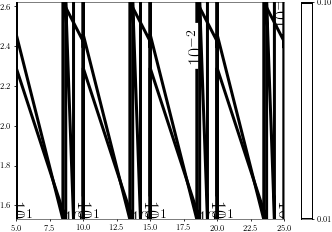

In [124]:
from matplotlib import ticker
ctr = plt.contour(X, Y, Z, locator=ticker.LogLocator(), colors='k', linewidths=3.0)
plt.clabel(ctr, inline=1, fontsize=20., fmt=ticker.LogFormatterMathtext())
plt.colorbar(ctr)
plt.show()

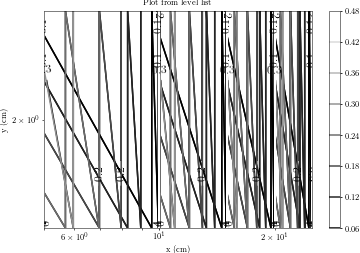

In [122]:
from matplotlib import ticker
contour = plt.contour(X, Y, Z, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contour(X, Y, Z)
plt.colorbar(contour_filled)
plt.title('Plot from level list')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

In [117]:
Z[29,29]

0.0

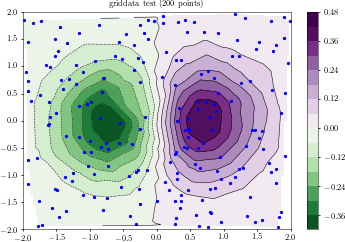

In [67]:
zi = griddata(x,y,z,xi,yi,interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.get_cmap('PRGn_r'),
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5,zorder=10)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()

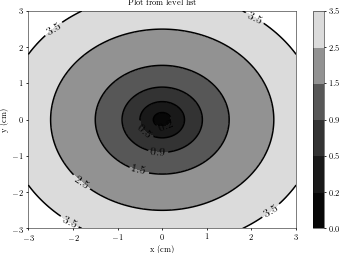

In [68]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X ** 2 + Y ** 2 )
plt.figure()
levels = [0.0, 0.2, 0.5, 0.9, 1.5, 2.5, 3.5]
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X, Y, Z, levels)
plt.colorbar(contour_filled)
plt.title('Plot from level list')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

In [69]:
X.shape


(100, 100)

In [70]:
Z.shape

(100, 100)

In [130]:
Z = np.zeros_like(X, dtype = 'float64')

In [106]:
type(Z)

numpy.ndarray

In [131]:
rowctr = 0
colctr = 0
for x1 in xlist:
    colctr = 0
    for y1 in ylist:
        print f(subset4D, x1, y1)
        Z[rowctr,colctr] = f(subset4D, x1, y1)
        colctr = colctr + 1
    rowctr  = rowctr + 1
        
        

Series([], Name: tcs_cost, dtype: float64)


ValueError: setting an array element with a sequence.

In [111]:
Z[0,0]

0.3579683

In [108]:
Z[0,0] = 0.003107

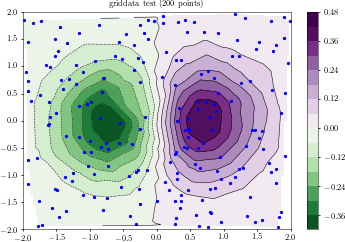

In [46]:
from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
seed(0)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)
# define grid.
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,200)
# grid the data.
zi = griddata(x,y,z,xi,yi,interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.get_cmap('PRGn_r'),
                 vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5,zorder=10)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()

In [39]:
zi

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [40]:
x

array([ 0.19525402,  0.86075747,  0.4110535 ,  0.17953273, -0.3053808 ,
        0.58357645, -0.24965115,  1.567092  ,  1.85465104, -0.46623392,
        1.16690015,  0.11557968,  0.27217824,  1.70238655, -1.71585577,
       -1.6514828 , -1.91912641,  1.33047938,  1.112627  ,  1.48004859,
        1.91447337,  1.19663426, -0.15408255,  1.12211671, -1.5269023 ,
        0.55968409, -1.42658685,  1.77867567,  0.08739329, -0.34135224,
       -0.94177755,  1.09693476, -0.17539867,  0.2737358 , -1.9248408 ,
        0.47054199,  0.44838289,  0.46773599,  1.77499231,  0.7272812 ,
       -0.5619684 , -0.25187218,  0.79052478, -1.75909811,  0.66706686,
        0.68255148, -1.15846976, -1.48429481, -0.7382866 , -0.54515692,
        0.28078708, -0.24559395,  1.95349535, -1.59182076, -1.16449298,
       -1.35476193,  0.6124333 , -0.98683359, -0.13475691, -1.02229763,
       -1.36412167, -1.55849944,  0.62531836, -1.44726819, -1.21367055,
       -0.52509932,  1.28397292, -1.6115949 ,  1.35177963, -1.61

In [42]:
xi.shape

(100,)

In [43]:
X.shape

(30, 30)